In [1]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
target=df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
inde=df.drop(['Survived','PassengerId','Name','Ticket','Cabin','Embarked','Parch'],axis='columns')
inde

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,3,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,3,male,35.0,0,8.0500
...,...,...,...,...,...
886,2,male,27.0,0,13.0000
887,1,female,19.0,0,30.0000
888,3,female,NaN,1,23.4500
889,1,male,26.0,0,30.0000


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
inde['sex_n']=LabelEncoder().fit_transform(inde['Sex'])
inde

,Pclass,Sex,Age,SibSp,Fare,sex_n
0,3,male,22.0,1,7.2500,1
1,1,female,38.0,1,71.2833,0
2,3,female,26.0,0,7.9250,0
3,1,female,35.0,1,53.1000,0
4,3,male,35.0,0,8.0500,1
...,...,...,...,...,...,...
886,2,male,27.0,0,13.0000,1
887,1,female,19.0,0,30.0000,0
888,3,female,NaN,1,23.4500,0
889,1,male,26.0,0,30.0000,1


In [29]:
inde=inde.drop('Sex',axis='columns')
inde

,Pclass,Age,SibSp,Fare,sex_n
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1
...,...,...,...,...,...
886,2,27.0,0,13.0000,1
887,1,19.0,0,30.0000,0
888,3,NaN,1,23.4500,0
889,1,26.0,0,30.0000,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(inde,target,test_size=0.2)

In [33]:
from sklearn import tree

In [34]:
model=tree.DecisionTreeClassifier()

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
model.score(x_test,y_test)

0.8156424581005587

In [37]:
y_pred=model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Text(33.22222222222222, 0.5, 'Truth')

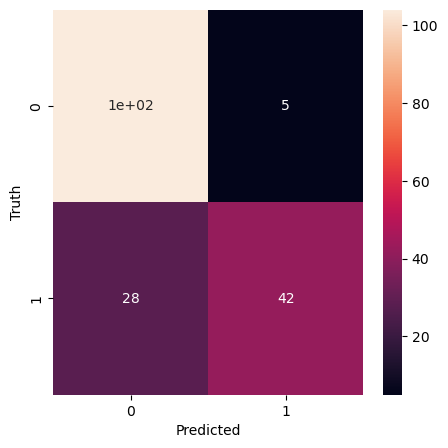

In [45]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')